In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import copy
from math import sqrt as sqrt
from math import acos as arccos
from math import asin as arcsin
from math import atan2 as arctan2
from math import pi

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

In [61]:
#Overview
print('The datat that I will be working with is Blended Sea wind data. The blended sea wind data is a measure of high-resolution ocean surface vector winds and wind stresses on 0.25 degree grid. The data has been recorded over the cumulative time of 11 years. According the National Center For Environmental Information, the data on belnded sea wind has been recorded since July 9, 1985 and it has been recorded over the cycle of "six-hourly, daily, monthly" obervation over 11 years. The data that I worked with was a recorded data from the year 2000. All of the vectors in the data table have been recorded at the exam same time over a monthly period. The blended observation over the surface wind has been done by six satilies, which allowed the creation of gridded wind speed. NOAA further states that blending multiple satellites filled up the missing gaps between the space and time of the data. This further increased the accuracy and reduced the possiblility of random errors by providing further support in the data of an individual satellite.')

The datat that I will be working with is Blended Sea wind data. The blended sea wind data is a measure of high-resolution ocean surface vector winds and wind stresses on 0.25 degree grid. The data has been recorded over the cumulative time of 11 years. According the National Center For Environmental Information, the data on belnded sea wind has been recorded since July 9, 1985 and it has been recorded over the cycle of "six-hourly, daily, monthly" obervation over 11 years. The data that I worked with was a recorded data from the year 2000. All of the vectors in the data table have been recorded at the exam same time over a monthly period. The blended observation over the surface wind has been done by six satilies, which allowed the creation of gridded wind speed. NOAA further states that blending multiple satellites filled up the missing gaps between the space and time of the data. This further increased the accuracy and reduced the possiblility of random errors by providing further su

In [63]:
# Problem
print('With the data given, the question that I posed to this data set was if the this data supported the theory on the global wind pattern. According to a research site by University of Illinois, the different wind patterns that takes place throughout the globe can be separated into three categories of Polar Easterlies, Prevailing Westerlies, and Tropical Easterlies. As I approach the given data by dividng the location of individual points into northern and southern side as the location given in the data are represented with latitude distant from its respective north or south pole. The questions was will the given data accord with the theory on the different pattern changing over the different sections that are separated by the windbelt throughout the equator. In order to test the hypothesis for this experiment, I tried to approach the problem by first narrowing down the area of rearch into blended wind over the atlantic ocean. In doing so, I will be able to increase the productivity of the experiment and increase efficiency in saving time for the experiment. Out of different recorded data over different location, I will randomnly select points over the atlantic ocean throughout various degrees of latitude. In doing so, I will be able to get a general reflection of the data of blended wind pattern over the atlantic ocean. I will be collecting data of blended wind from about 40 different location over the atlantic ocean. In the later process of the experiment, I will visualize the the given data over different location by scattering them over the global map. In addition, the visualization of the direction of blended wind for each location will be added to the visualization. As a mode of calculating the direction of the wind at given point, I will apply the direction equation that has been used in the previous classes. As further visualization, I will also incorporate the make_rose_diagram that has been used in the previous inclass assignment to demonstrate a clear visualization of the mean direction of the wind over different degree of latitude. From the given data points, I will be separating the wind in different location, largely, into six different group. 1. Northern polar eaterlies which takes place between the degree of 60 and 90 degree. 2. Southern polar eaterlies which takes place between the degree of 60 and 90. 3. Northern Prevailing westerlies between 30 and 60 degrees. 4. Southern prevailing westerlies between 30 and 60 degrees. 5. Northern Tropical eaterlies which takes place between 0 and 30 degrees. 6. Sourhtern Tropical eaterlies which takes place between 0 and 30 degree. Moreover, I will use bootstrap sampling in order to approximize the randomness over the data that is given.')


With the data given, the question that I posed to this data set was if the this data supported the theory on the global wind pattern. According to a research site by University of Illinois, the different wind patterns that takes place throughout the globe can be separated into three categories of Polar Easterlies, Prevailing Westerlies, and Tropical Easterlies. As I approach the given data by dividng the location of individual points into northern and southern side as the location given in the data are represented with latitude distant from its respective north or south pole. The questions was will the given data accord with the theory on the different pattern changing over the different sections that are separated by the windbelt throughout the equator. In order to test the hypothesis for this experiment, I tried to approach the problem by first narrowing down the area of rearch into blended wind over the atlantic ocean. In doing so, I will be able to increase the productivity of the 

In [2]:
def direction(x_vector, y_vector):
    hoo = []
    for i in range(len(x_vector)):
        wind_abs = sqrt(x_vector[i]**2 + y_vector[i]**2)
        wind_dir_trig_to = arctan2(np.array(y_vector[i])/wind_abs, np.array(x_vector[i])/wind_abs,) 
        wind_dir_trig_to_degrees = wind_dir_trig_to * 180/pi
        wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180
        wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
        hoo.append(wind_dir_cardinal)
    return hoo

In [33]:
def get_arrow_lengths(azimuth):
    azimuth_radians = np.radians(abs(azimuth))
    x_length = np.sin(azimuth_radians)
    y_length = np.cos(azimuth_radians)
    return x_length,y_length



In [34]:
def make_rose_diagram(azimuths,color='black',bin_width=10,title='',mean_direction=None):
    binarray = np.arange(0,360+bin_width,bin_width) # make an array to use for bins in plt.hist
    azimuth_counts, azimuth_bins, patches = plt.hist(azimuths,bins=binarray) # get back the counts
    plt.clf()
    bins = binarray[0:-1] # delete the last bin
    thetas = np.radians(bins) # convert the binarray to radians.  
    widths = np.radians(np.ones(len(thetas))*bin_width) # make the widths array

    fig = plt.subplot(111, polar=True) # Specify polar axes
    fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
    fig.set_theta_zero_location("N") # Specify 0-degrees as North
    plt.bar(thetas, azimuth_counts, width=widths, bottom=0, color=color)
    if mean_direction != None:
        plt.bar(np.radians(mean_direction), np.max(azimuth_counts), width=0.01,bottom=0, color='black')
    plt.title(title)
    plt.show()

In [35]:
angle = 0
def mean_angular_direction(x_total,y_total):
    global angle
    if (x_total > 0) & (y_total > 0):
        angle = np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total > 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total > 0):
        angle = 360+np.rad2deg(np.arctan(x_total/y_total))
    return(angle)



In [36]:
point1 = pd.read_csv('1.txt')
point1['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']
point2 = pd.read_csv('2.txt')
point2['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point3 = pd.read_csv('3.txt')
point3['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point4 = pd.read_csv('4.txt')
point4['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point5 = pd.read_csv('5.txt')
point5['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point6 = pd.read_csv('6.txt')
point6['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point7 = pd.read_csv('7.txt')
point7['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point8 =pd.read_csv('8.txt')
point8['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point9 = pd.read_csv('9.txt')
point9['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point10 = pd.read_csv('10.txt')
point10['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point11 = pd.read_csv('11.txt')
point11['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point12 = pd.read_csv('12.txt')
point12['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point13 = pd.read_csv('13.txt')
point13['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point14 = pd.read_csv('14.txt')
point14['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point15 = pd.read_csv('15.txt')
point15['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point16 = pd.read_csv('16.txt')
point16['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point17 = pd.read_csv('17.txt')
point17['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point18 = pd.read_csv('18.txt')
point18['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point19 = pd.read_csv('19.txt')
point19['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point20 = pd.read_csv('20.txt')
point20['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point21 = pd.read_csv('21.txt')
point21['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point22 = pd.read_csv('22.txt')
point22['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']
point23 = pd.read_csv('23.txt')
point23['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point24 = pd.read_csv('24.txt')
point24['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point25 = pd.read_csv('25.txt')
point25['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point26 = pd.read_csv('26.txt')
point26['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point27 = pd.read_csv('27.txt')
point27['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point28 = pd.read_csv('28.txt')
point28['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point29 =pd.read_csv('29.txt')
point29['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point30 = pd.read_csv('30.txt')
point30['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point31 = pd.read_csv('31.txt')
point31['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point32 = pd.read_csv('32.txt')
point32['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point33 = pd.read_csv('33.txt')
point33['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point37 = pd.read_csv('37.txt')
point37['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point38 = pd.read_csv('38.txt')
point38['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

point40 = pd.read_csv('40.txt')
point40['axis:time'] = ['Jan.15.00', 'Feb.15.00', 'Mar.16,00', 'Apr.15.00', 'May.15.00', 'Jun.15.00', 'Jul.15.00', 'Aug.15.00', 'Sep.15.00', 'Oct.15.00', 'Nov.15.00', 'Dec.15.00']

location = [point1, point2, point3, point4, point5, point6, point7, point8, point9, point10, point11, point12, point13, point14, point15, point16, point17, point18, point19, point20, point21, point22, point23, point24, point25, point26, point27, point28, point29, point30, point31, point32, point33, point37, point38, point40]
concatenate_location = pd.concat(location)
concatenate_location['data:direction'] = direction(np.array(concatenate_location['data:u']), np.array(concatenate_location['data:v']))
concatenate_location

,axis:latitude,axis:longitude,axis:time,axis:z,data:u,data:v,data:w,data:direction
0,75.0,-2.75,Jan.15.00,10.0,0.181177,-4.449295,9.673008,-2.331821
1,75.0,-2.75,Feb.15.00,10.0,-0.002282,-5.980527,10.971842,0.021861
2,75.0,-2.75,"Mar.16,00",10.0,0.155464,-4.164767,9.918195,-2.137768
3,75.0,-2.75,Apr.15.00,10.0,0.629455,-3.645082,8.547226,-9.797560
4,75.0,-2.75,May.15.00,10.0,-0.469141,-2.711480,6.311658,9.816149
...,...,...,...,...,...,...,...,...
7,-58.0,-29.00,Aug.15.00,10.0,7.125568,2.536867,12.430799,-109.596907
8,-58.0,-29.00,Sep.15.00,10.0,4.997147,2.607045,11.398205,-117.551349
9,-58.0,-29.00,Oct.15.00,10.0,7.388700,3.234718,15.373357,-113.643445
10,-58.0,-29.00,Nov.15.00,10.0,6.184533,-0.141173,10.614173,-88.692351


In [71]:
print('In this step, I tried to concatenate the different data tables of the blended wind data over different location throughout the atlantic ocean. In addition, I changed the content of the time column for a clearer visualization of the data. Also, using the direction equation, I added a column, "data:direction", into the table called concatenate_location for the further use in later process of the experiment.')

In this step, I tried to concatenate the different data tables of the blended wind data over different location throughout the atlantic ocean. In addition, I changed the content of the time column for a clearer visualization of the data. Also, using the direction equation, I added a column, "data:direction", into the table called concatenate_location for the further use in later process of the experiment.


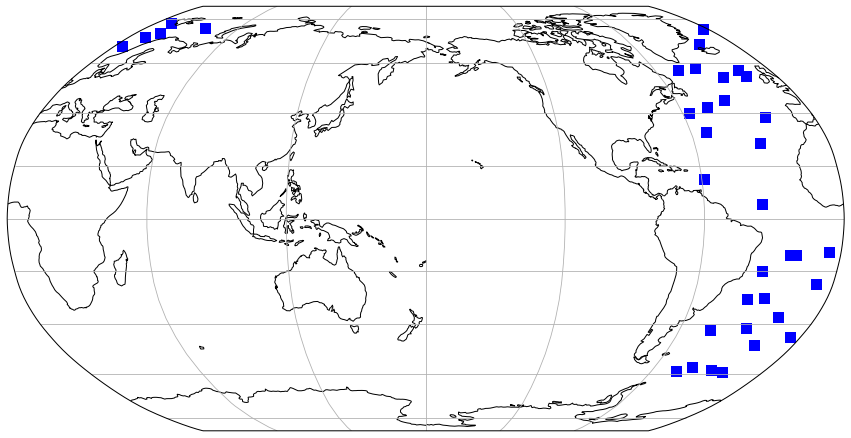

In [37]:
plt.figure(1,(15,15)) # make a big figure 

ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

data = Reader('Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), facecolor='none',
                  linewidth=3, label='transform boundary')

data = Reader('Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                   facecolor='none',
                  linewidth=3)

data = Reader('Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                   facecolor='none',
                  linewidth=3)
plt.scatter(concatenate_location['axis:longitude'], concatenate_location['axis:latitude'], transform=ccrs.PlateCarree(), s=100, color='blue', marker='s' )


In [72]:
print('This is the first step of my data visualization. I tried to import the global map into the notebook and plotted points from randomn location over the Atlantic ocean. I labeled it in a square shaped points with blue color for the clearer distinction. ')

This is the first step of my data visualization. I tried to import the global map into the notebook and plotted points from randomn location over the Atlantic ocean. I labeled it in a square shaped points with blue color for the clearer distinction. 


In [38]:
concatenate_location['x_length'] = np.zeros(len(concatenate_location))
concatenate_location['y_length'] = np.zeros(len(concatenate_location))

concatenate_location['x_length'],concatenate_location['y_length'] = get_arrow_lengths(concatenate_location['data:direction'])
concatenate_location

,axis:latitude,axis:longitude,axis:time,axis:z,data:u,data:v,data:w,data:direction,x_length,y_length
0,75.0,-2.75,Jan.15.00,10.0,0.181177,-4.449295,9.673008,-2.331821,0.040687,0.999172
1,75.0,-2.75,Feb.15.00,10.0,-0.002282,-5.980527,10.971842,0.021861,0.000382,1.000000
2,75.0,-2.75,"Mar.16,00",10.0,0.155464,-4.164767,9.918195,-2.137768,0.037302,0.999304
3,75.0,-2.75,Apr.15.00,10.0,0.629455,-3.645082,8.547226,-9.797560,0.170168,0.985415
4,75.0,-2.75,May.15.00,10.0,-0.469141,-2.711480,6.311658,9.816149,0.170487,0.985360
...,...,...,...,...,...,...,...,...,...,...
7,-58.0,-29.00,Aug.15.00,10.0,7.125568,2.536867,12.430799,-109.596907,0.942076,-0.335401
8,-58.0,-29.00,Sep.15.00,10.0,4.997147,2.607045,11.398205,-117.551349,0.886597,-0.462543
9,-58.0,-29.00,Oct.15.00,10.0,7.388700,3.234718,15.373357,-113.643445,0.916059,-0.401044
10,-58.0,-29.00,Nov.15.00,10.0,6.184533,-0.141173,10.614173,-88.692351,0.999740,0.022821


In [73]:
print("As part of the second step in visualization, I needed to add the column of x_length and y_length into my data table. These columns are going to be used in drawing arrows that represents the direction of the wind from different location on the previous map.")

As part of the second step in visualization, I needed to add the column of x_length and y_length into my data table. These columns are going to be used in drawing arrows that represents the direction of the wind from different location on the previous map.


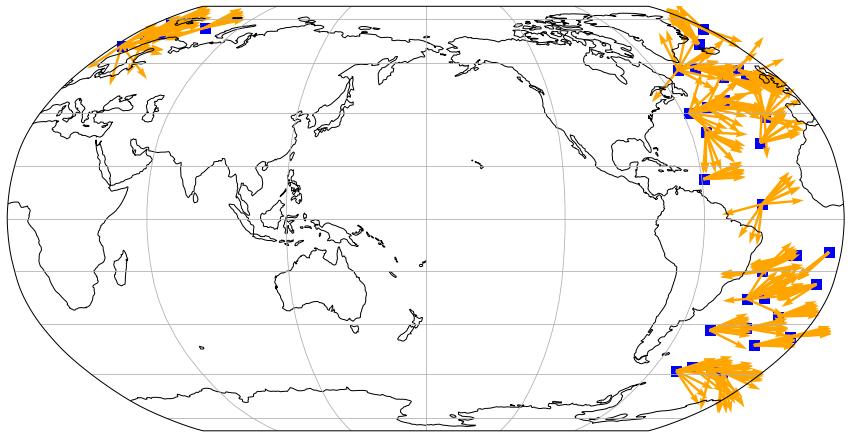

In [39]:
plt.figure(1,(15,15)) # make a big figure 

ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

data = Reader('Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), facecolor='none',
                  linewidth=3, label='transform boundary')

data = Reader('Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                   facecolor='none',
                  linewidth=3)

data = Reader('Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                   facecolor='none',
                  linewidth=3)
plt.scatter(concatenate_location['axis:longitude'], concatenate_location['axis:latitude'], transform=ccrs.PlateCarree(), s=120, color='blue', marker='s' )

plt.quiver(np.array(concatenate_location['axis:longitude']),np.array(concatenate_location['axis:latitude']),
           np.array(concatenate_location['x_length']),np.array(concatenate_location['y_length']),
           scale=20,transform=ccrs.PlateCarree(),color='orange')
plt.show()

In [74]:
print('Here, I added the arrows that represents the direction of the wind that is given in the data of each points. In some of the points the arrows are pointed in two different directions, but the majority of the points seems to demonstrate a clear pattern of different wind from the points that are located in a higher or lower latitude. For example, the points that are located close to the north pole (norhtern polar easter lies) shows a trend in wind direction directed towards north pole as it is also supported by the article in Climate Science Investigation. As we observe locations in further down towards the south pole, the points demonstrates a trend in wind direction towards the similar degree throughout the equator. Based off of the map, the arrows breaching out from different points are mostly directed towards the right side. From the points that are close to the equator, the arrows are directed closely to the equator where the head of the arrows points to each other. As for some other points, there are some arrows that are directly towards the left or the latitude of the 30 degree.')

Here, I added the arrows that represents the direction of the wind that is given in the data of each points. In some of the points the arrows are pointed in two different directions, but the majority of the points seems to demonstrate a clear pattern of different wind from the points that are located in a higher or lower latitude. For example, the points that are located close to the north pole (norhtern polar easter lies) shows a trend in wind direction directed towards north pole as it is also supported by the article in Climate Science Investigation. As we observe locations in further down towards the south pole, the points demonstrates a trend in wind direction towards the similar degree throughout the equator. Based off of the map, the arrows breaching out from different points are mostly directed towards the right side. From the points that are close to the equator, the arrows are directed closely to the equator where the head of the arrows points to each other. As for some other

In [41]:
polar_easterlies_n = concatenate_location[(concatenate_location['axis:latitude'] > 60) &
                                         (concatenate_location['axis:latitude'] < 90)]
polar_easterlies_s = concatenate_location[(concatenate_location['axis:latitude'] < -60) &
                                         (concatenate_location['axis:latitude'] > -90)]

prevailing_westerlies_n = concatenate_location[(concatenate_location['axis:latitude'] > 30) &
                                              (concatenate_location['axis:latitude'] < 60)]
prevailing_westerlies_s = concatenate_location[(concatenate_location['axis:latitude'] > -60) &
                                              (concatenate_location['axis:latitude'] < -30)]

tropical_easterlies_n = concatenate_location[(concatenate_location['axis:latitude'] > 0) &
                                            (concatenate_location['axis:latitude'] < 30)]
tropical_easterlies_s = concatenate_location[(concatenate_location['axis:latitude'] > 0) &
                                            (concatenate_location['axis:latitude'] > -30)]

In [75]:
print('This is the step where I differentiated by data table into four different categories of northern and southern polar eaterlies, northern and southern prevailing westerlies, and northern and southern tropical eaterlies. I differentiated the data by specifying the range of latitude for each region that was given by the article from Climate Science Investigation.')

This is the step where I differentiated by data table into four different categories of northern and southern polar eaterlies, northern and southern prevailing westerlies, and northern and southern tropical eaterlies. I differentiated the data by specifying the range of latitude for each region that was given by the article from Climate Science Investigation.


In [42]:
x_total_polar_easterlies_n = np.sum(polar_easterlies_n['x_length'])
y_total_polar_easterlies_n = np.sum(polar_easterlies_n['y_length'])

x_total_polar_easterlies_s = np.sum(polar_easterlies_s['x_length'])
y_total_polar_easterlies_s = np.sum(polar_easterlies_s['y_length'])


x_total_prevailing_westerlies_n = np.sum(prevailing_westerlies_n['x_length'])
y_total_prevailing_westerlies_n = np.sum(prevailing_westerlies_n['y_length'])

x_total_prevailing_westerlies_s = np.sum(prevailing_westerlies_s['x_length'])
y_total_prevailing_westerlies_s = np.sum(prevailing_westerlies_s['y_length'])

x_total_tropical_easterlies_n = np.sum(tropical_easterlies_n['x_length'])
y_total_tropical_easterlies_n = np.sum(tropical_easterlies_n['y_length'])

x_total_tropical_easterlies_s = np.sum(tropical_easterlies_s['x_length'])
y_total_tropical_easterlies_s = np.sum(tropical_easterlies_s['y_length'])


In [43]:
polar_easterlies_n_mean = mean_angular_direction(x_total_polar_easterlies_n,y_total_polar_easterlies_n)
polar_easterlies_s_mean = mean_angular_direction(x_total_polar_easterlies_s,y_total_polar_easterlies_s)

prevailing_westerlies_n_mean = mean_angular_direction(x_total_prevailing_westerlies_n,y_total_prevailing_westerlies_n)
prevailing_westerlies_s_mean = mean_angular_direction(x_total_prevailing_westerlies_s,y_total_prevailing_westerlies_s)

tropical_easterlies_n_mean = mean_angular_direction(x_total_tropical_easterlies_n,y_total_tropical_easterlies_n)
tropical_easterlies_s_mean = mean_angular_direction(x_total_tropical_easterlies_s,y_total_tropical_easterlies_s)


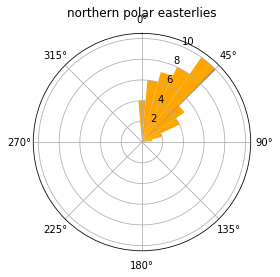

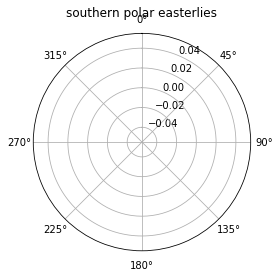

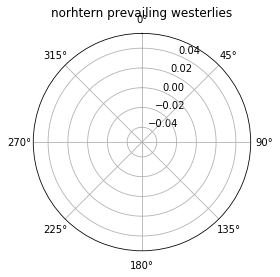

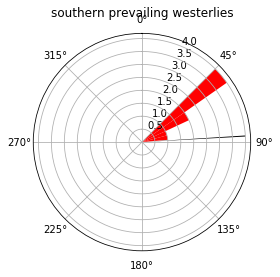

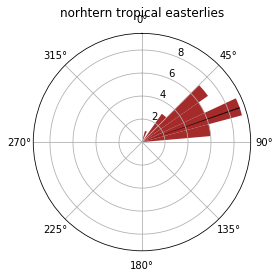

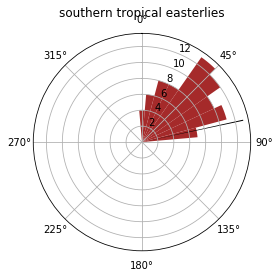

In [44]:
make_rose_diagram(polar_easterlies_n['data:direction'],color='orange',title='northern polar easterlies',mean_direction=polar_easterlies_n_mean)
make_rose_diagram(polar_easterlies_s['data:direction'],color='orange',title='southern polar easterlies',mean_direction=polar_easterlies_s_mean)

make_rose_diagram(prevailing_westerlies_n['data:direction'],color='red',title='norhtern prevailing westerlies',mean_direction=prevailing_westerlies_n_mean)
make_rose_diagram(prevailing_westerlies_s['data:direction'],color='red',title='southern prevailing westerlies',mean_direction=prevailing_westerlies_s_mean)

make_rose_diagram(tropical_easterlies_n['data:direction'],color='brown',title='norhtern tropical easterlies',mean_direction=tropical_easterlies_n_mean)
make_rose_diagram(tropical_easterlies_s['data:direction'],color='brown',title='southern tropical easterlies',mean_direction=tropical_easterlies_s_mean)


In [45]:
polar_easterlies_n_mean_angles = []

for n in range(0,10000):
    resampled = polar_easterlies_n.sample(n=len(polar_easterlies_n),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    polar_easterlies_n_mean_angles.append(mean_angle+180)    
    

In [46]:
polar_easterlies_s_mean_angles = []

for n in range(0,10000):
    resampled = polar_easterlies_s.sample(n=len(polar_easterlies_s),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    polar_easterlies_s_mean_angles.append(mean_angle+180)


In [47]:
prevailing_westerlies_n_mean_angles = []

for n in range(0,10000):
    resampled = prevailing_westerlies_n.sample(n=len(prevailing_westerlies_n),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    prevailing_westerlies_n_mean_angles.append(mean_angle+180)

In [48]:
prevailing_westerlies_s_mean_angles = []

for n in range(0,10000):
    resampled = prevailing_westerlies_s.sample(n=len(prevailing_westerlies_s),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    prevailing_westerlies_s_mean_angles.append(mean_angle+180)

In [49]:
tropical_easterlies_n_mean_angles = []

for n in range(0,10000):
    resampled = tropical_easterlies_n.sample(n=len(tropical_easterlies_n),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    tropical_easterlies_n_mean_angles.append(mean_angle+180)

In [50]:
tropical_easterlies_s_mean_angles = []

for n in range(0,10000):
    resampled = tropical_easterlies_s.sample(n=len(tropical_easterlies_s),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    tropical_easterlies_s_mean_angles.append(mean_angle+180)

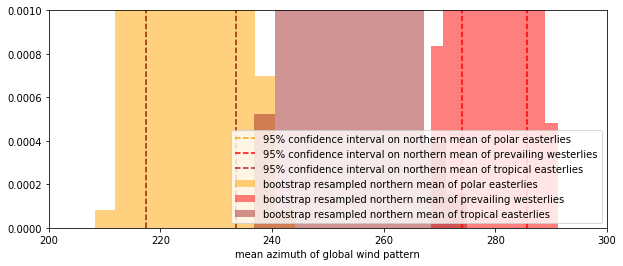

In [51]:
plt.figure(figsize=(10,4))
plt.hist(polar_easterlies_n_mean_angles,alpha=0.5,density=True,color='orange',label='bootstrap resampled northern mean of polar easterlies')
plt.hist(prevailing_westerlies_n_mean_angles,alpha=0.5,density=True,color='red',label='bootstrap resampled northern mean of prevailing westerlies')
plt.hist(tropical_easterlies_n_mean_angles,alpha=0.5,density=True,color='brown',label='bootstrap resampled northern mean of tropical easterlies')

plt.axvline(x=np.percentile(polar_easterlies_n_mean_angles,2.5),linestyle='--',color='orange',label='95% confidence interval on northern mean of polar easterlies')
plt.axvline(x=np.percentile(polar_easterlies_n_mean_angles,97.5),linestyle='--',color='orange')
plt.axvline(x=np.percentile(prevailing_westerlies_n_mean_angles,2.5),linestyle='--',color='red',label='95% confidence interval on northern mean of prevailing westerlies')
plt.axvline(x=np.percentile(prevailing_westerlies_n_mean_angles,97.5),linestyle='--',color='red')
plt.axvline(x=np.percentile(polar_easterlies_n_mean_angles,2.5),linestyle='--',color='brown',label='95% confidence interval on northern mean of tropical easterlies')
plt.axvline(x=np.percentile(polar_easterlies_n_mean_angles,97.5),linestyle='--',color='brown')
plt.legend(loc='lower right')
plt.xlim(200, 300)
plt.ylim(0, 0.001)
plt.xlabel('mean azimuth of global wind pattern')
plt.show()

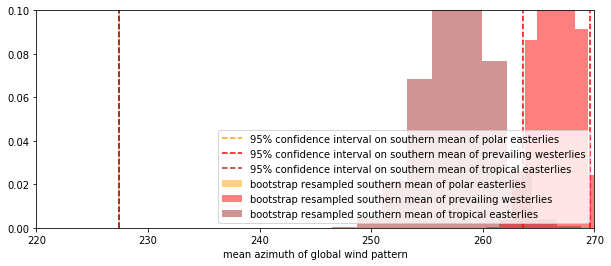

In [52]:
plt.figure(figsize=(10,4))
plt.hist(polar_easterlies_s_mean_angles,alpha=0.5,density=True,color='orange',label='bootstrap resampled southern mean of polar easterlies')
plt.hist(prevailing_westerlies_s_mean_angles,alpha=0.5,density=True,color='red',label='bootstrap resampled southern mean of prevailing westerlies')
plt.hist(tropical_easterlies_s_mean_angles,alpha=0.5,density=True,color='brown',label='bootstrap resampled southern mean of tropical easterlies')

plt.axvline(x=np.percentile(polar_easterlies_s_mean_angles,2.5),linestyle='--',color='orange',label='95% confidence interval on southern mean of polar easterlies')
plt.axvline(x=np.percentile(polar_easterlies_s_mean_angles,97.5),linestyle='--',color='orange')
plt.axvline(x=np.percentile(prevailing_westerlies_s_mean_angles,2.5),linestyle='--',color='red',label='95% confidence interval on southern mean of prevailing westerlies')
plt.axvline(x=np.percentile(prevailing_westerlies_s_mean_angles,97.5),linestyle='--',color='red')
plt.axvline(x=np.percentile(polar_easterlies_s_mean_angles,2.5),linestyle='--',color='brown',label='95% confidence interval on southern mean of tropical easterlies')
plt.axvline(x=np.percentile(polar_easterlies_s_mean_angles,97.5),linestyle='--',color='brown')
plt.legend(loc='lower right')
plt.xlim(220, 270)
plt.ylim(0, 0.1)
plt.xlabel('mean azimuth of global wind pattern')
plt.show()

In [77]:
# Markdown of the experiment
print('Throughout the experiment, the resulting analysis of the data seemed to demonstrate a clear contrast against the hypothesis that was initially set out for the experiment. As from the visualization step of the experiment, majoriry of the points excerted a direction of wind directed towards the degree between 50 and 60 degree in latitude from the map. Although there were some other points that demonstrated wind direction towards 30 degree latitude, the number of these points were not enough to demonstrate a clear difference from those that had wind direction towards the latitude of 50 to 60 degrees. The contrasting result is also further supported through the rose diagram and bootstrap sampling of each mean direction from six different groups of wind direction. The mean angle of northern polar easterlies, southern prevailing westerlies, northern tropical easterlies, and southern tropical easterlies excerted direction from 30 to 60 degree. In the bootstrap sampling, the histogram of the mean direction of each group from northern part of the atlantic ocean and southern part of the atlantic ocean demonstrated an overlap, which signfies that these means can not be distinct from one another. Therefore, the data that was given was shown to prove that these mean data over the wind direction can not be distinguished. Nevertheless, the data from 40 different points seems to signify a biased information, where the quantity of the data was not enough to signify an objective representation of wind direction varying from different latitudes. Also, the visualization of the experiment is missing some of the data as the bootstrap sample of sourthern blended wind does not represent the histogram of southern mean of polar easterlies. This can also be seen in rose diagram, representing northern prevailing westerlies and southern prevailing westerlies. As the function of "make_rose_diagram" was implemented during class in order to analyze the change in direction of the wind, the implementation of the function was not able to capture the data of a negative wind direction in northern and southern prevailing westerlies. I tried to accomodate this error by placing an abs() on the input of the get_arrow_length function, but still failed in fully representing the data.')

Throughout the experiment, the resulting analysis of the data seemed to demonstrate a clear contrast against the hypothesis that was initially set out for the experiment. As from the visualization step of the experiment, majoriry of the points excerted a direction of wind directed towards the degree between 50 and 60 degree in latitude from the map. Although there were some other points that demonstrated wind direction towards 30 degree latitude, the number of these points were not enough to demonstrate a clear difference from those that had wind direction towards the latitude of 50 to 60 degrees. The contrasting result is also further supported through the rose diagram and bootstrap sampling of each mean direction from six different groups of wind direction. The mean angle of northern polar easterlies, southern prevailing westerlies, northern tropical easterlies, and southern tropical easterlies excerted direction from 30 to 60 degree. In the bootstrap sampling, the histogram of the m

In [66]:
### Citation / Resource
# http://ww2010.atmos.uiuc.edu/(Gh)/wwhlpr/global_winds.rxml
# https://www.ncdc.noaa.gov/data-access/marineocean-data/blended-global/blended-sea-winds
# http://www.ces.fau.edu/nasa/content/resources/global-wind-patterns.php
# https://transportgeography.org/?page_id=379
# https://data.planetos.com/datasets/noaa_blended_sea_winds_clim_global

In [78]:
# Acknowledgement
print('As I mentioned earlier, the resulting analyzation of the data largely contrasted the initial hypothesis that I posed at the beginning of the experiment as majority of the points demonstrated wind direction towards the similar degree. However, the data that was used in the experiment was largely flawed in objectivity as the number of given points were not enough to fully represent the difference in the change in direction of the wind in different latitude. There is a possibility that the arrows may represent clearer difference if there were more points included during the experiment. Also, the visualization and accuracy of the experiment was largely hindered by the lack of accurate code that could fully demonstrate the data. As there were missing areas in making rose diagram and bootstraping, it demonstrates that the points with negative direction of the wind were not able to be visualized by the functions that I had. In conclusion, the accuracy and objectiveness of the experiment may have been higher if there were more points and better accuracy could have been achieved if the codes that accomodated the experiment were able to represent negative direction of the wind.')

As I mentioned earlier, the resulting analyzation of the data largely contrasted the initial hypothesis that I posed at the beginning of the experiment as majority of the points demonstrated wind direction towards the similar degree. However, the data that was used in the experiment was largely flawed in objectivity as the number of given points were not enough to fully represent the difference in the change in direction of the wind in different latitude. There is a possibility that the arrows may represent clearer difference if there were more points included during the experiment. Also, the visualization and accuracy of the experiment was largely hindered by the lack of accurate code that could fully demonstrate the data. As there were missing areas in making rose diagram and bootstraping, it demonstrates that the points with negative direction of the wind were not able to be visualized by the functions that I had. In conclusion, the accuracy and objectiveness of the experiment may h